In [2]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt

from comp_inhib_wc import sim_dev, plot_sim_dev

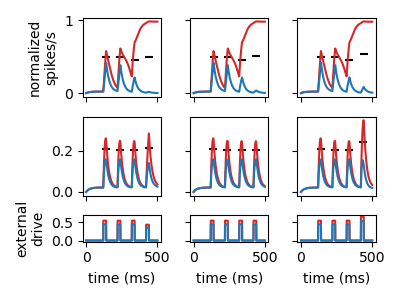

In [3]:
# for final figures!!!!

dev = 0.2  # change in proportion of original injected excitation

w_ii, w_ij, w_ii_l2, w_ij_l2, w_fb = [1., -0.33840608, 0.2270948, -0.2, -1.]

tau = 20
tau_2 = 20
thresh = 0.5
thresh_2 = 0.5
steepness = 8
steepness_2 = 15

# setup figure
gridspec = {'width_ratios': [1, 1, 1], 'height_ratios': [3, 3, 1]}
fig, axes = plt.subplots(3, 3, sharex='col', sharey='row',
                         gridspec_kw=gridspec, figsize=(4, 3))

# -DEV; without L6
times, x, inj_excite, _ = sim_dev(dev=-dev,
                                  w_ii=w_ii,
                                  w_ij=w_ij,
                                  w_ii_l2=w_ii_l2,
                                  w_ij_l2=w_ij_l2,
                                  w_fb=0,
                                  tau=tau,
                                  tau_2=tau_2,
                                  thresh=thresh,
                                  thresh_2=thresh_2,
                                  steepness=steepness,
                                  steepness_2=steepness_2,)
plot_sim_dev(times, x[:, :2], axes[0, 0])  # only plot first subgroup

# 0 DEV; without L6
times, x, inj_excite, _ = sim_dev(dev=0.0,
                                  w_ii=w_ii,
                                  w_ij=w_ij,
                                  w_ii_l2=w_ii_l2,
                                  w_ij_l2=w_ij_l2,
                                  w_fb=0,
                                  tau=tau,
                                  tau_2=tau_2,
                                  thresh=thresh,
                                  thresh_2=thresh_2,
                                  steepness=steepness,
                                  steepness_2=steepness_2)
plot_sim_dev(times, x[:, :2], axes[0, 1])  # only plot first subgroup

# +DEV; without L6
times, x, inj_excite, _ = sim_dev(dev=dev,
                                  w_ii=w_ii,
                                  w_ij=w_ij,
                                  w_ii_l2=w_ii_l2,
                                  w_ij_l2=w_ij_l2,
                                  w_fb=0,
                                  tau=tau,
                                  tau_2=tau_2,
                                  thresh=thresh,
                                  thresh_2=thresh_2,
                                  steepness=steepness,
                                  steepness_2=steepness_2)
plot_sim_dev(times, x[:, :2], axes[0, 2])  # only plot first subgroup

# -DEV; with L6
times, x, inj_excite, _ = sim_dev(dev=-dev,
                                  w_ii=w_ii,
                                  w_ij=w_ij,
                                  w_ii_l2=w_ii_l2,
                                  w_ij_l2=w_ij_l2,
                                  w_fb=w_fb,
                                  tau=tau,
                                  tau_2=tau_2,
                                  thresh=thresh,
                                  thresh_2=thresh_2,
                                  steepness=steepness,
                                  steepness_2=steepness_2)
plot_sim_dev(times, x[:, :2], axes[1, 0])  # now plot both subgroups
# plot time course for injected excitation
colors = ['tab:red', 'tab:blue']
for unit_idx in range(inj_excite.shape[1] // 2):
    inj_excite_traj = inj_excite[:, unit_idx]
    axes[2, 0].plot(times, inj_excite_traj, color=colors[unit_idx], alpha=1.0)
    # # ax_2.set_ylim([0, 1])
    # ax_2.set_yticks([0, 0.5])

# 0 DEV; with L6
times, x, inj_excite, w = sim_dev(dev=0.0,
                                  w_ii=w_ii,
                                  w_ij=w_ij,
                                  w_ii_l2=w_ii_l2,
                                  w_ij_l2=w_ij_l2,
                                  w_fb=w_fb,
                                  tau=tau,
                                  tau_2=tau_2,
                                  thresh=thresh,
                                  thresh_2=thresh_2,
                                  steepness=steepness,
                                  steepness_2=steepness_2)
plot_sim_dev(times, x[:, :2], axes[1, 1])  # now plot both subgroups
# plot time course for injected excitation
for unit_idx in range(inj_excite.shape[1] // 2):
    inj_excite_traj = inj_excite[:, unit_idx]
    axes[2, 1].plot(times, inj_excite_traj, color=colors[unit_idx], alpha=1.0)
    # ax_2.set_ylim([0, 1])
    # ax_2.set_yticks([0, 0.5])

# +DEV; with L6
times, x, inj_excite, w = sim_dev(dev=dev,
                                  w_ii=w_ii,
                                  w_ij=w_ij,
                                  w_ii_l2=w_ii_l2,
                                  w_ij_l2=w_ij_l2,
                                  w_fb=w_fb,
                                  tau=tau,
                                  tau_2=tau_2,
                                  thresh=thresh,
                                  thresh_2=thresh_2,
                                  steepness=steepness,
                                  steepness_2=steepness_2)
plot_sim_dev(times, x[:, :2], axes[1, 2])  # now plot both subgroups
# plot time course for injected excitation
for unit_idx in range(inj_excite.shape[1] // 2):
    inj_excite_traj = inj_excite[:, unit_idx]
    axes[2, 2].plot(times, inj_excite_traj, color=colors[unit_idx], alpha=1.0)
    # ax_2.set_ylim([0, 1])
    # ax_2.set_yticks([0, 0.5])

axes[0, 0].set_ylabel('normalized\nspikes/s')
axes[2, 0].set_ylabel('external\ndrive')
axes[2, 0].set_xlabel('time (ms)')
axes[2, 1].set_xlabel('time (ms)')
axes[2, 2].set_xlabel('time (ms)')
fig.tight_layout()
plt.show()

In [ ]:
# fig.savefig('simple_model_example_detailed.pdf')

In [ ]:
inhib = -1 * (x @ (w * (np.ones_like(w) - np.eye(w.shape[0]))))

inhib_red = inhib[:, 0]
inhib_blue = inhib[:, 0]

colors = ['tab:red', 'tab:blue']
fig, axes = plt.subplots(1, 2, figsize=(6, 6))
axes[0].plot(times, inhib[:, 0], color=colors[0])
axes[0].plot(times, inhib[:, 1], color=colors[1])
axes[1].plot(inhib[:, 1], inhib[:, 0])
plt.show()